In [26]:
import pickle,glob
import pandas as pd
import matplotlib as plt

In [27]:
%matplotlib inline

In [2]:
listeTirages=glob.glob("/Users/gilles/ownCloud/Recherche/Boye/HDR/Data/Longitudinales/*-X-paradigmes*.csv")
listeTiragesMorphomes=glob.glob("/Users/gilles/ownCloud/Recherche/Boye/HDR/Data/Longitudinales/*-X-Morphomes-paradigmes-Swim*.csv")

In [3]:
def tiragesNom(nom,listeTirages):
    result=[tirage for tirage in listeTirages if nom in tirage]
    return sorted(result)

In [4]:
def extractOverabundance(df):
    del df["Unnamed: 0"]
    dfFormes=pd.melt(df,id_vars=["lexeme"]).dropna()
    return dfFormes[dfFormes["value"].str.contains(",")]

In [14]:
def overabundanceNb(numero):
    serie=u"Longitudinal-%02d"%numero
    paradigmesFichiers=tiragesNom(serie,listeTirages)
    paradigmesFichiersMorphomes=tiragesNom(serie,listeTiragesMorphomes)
#    print paradigmesFichiers,paradigmesFichiersMorphomes
    overabundance=[]
    for fichier in paradigmesFichiers:
        overabundance.append(extractOverabundance(pd.read_csv(fichier,sep=";")))
    for fichier in paradigmesFichiersMorphomes:
        overabundance.append(extractOverabundance(pd.read_csv(fichier,sep=";")))    
    print numero,":\t",
    if len(overabundance)==5:
        overabundance=[overabundance[n] for n in [2,0,1,3,4]]
        for over in overabundance:
            print over.count()[0],"\t",
    print
    return [e.count()[0] for e in overabundance]

In [17]:
nbOverabundance={}
for n in range(51):
    nbOverabundance[n]=overabundanceNb(n)

0 :	2 	2 	2 	2 	2 	
1 :	5 	5 	5 	8 	14 	
2 :	6 	6 	7 	13 	20 	
3 :	8 	8 	9 	15 	20 	
4 :	11 	12 	14 	27 	69 	
5 :	14 	16 	25 	32 	51 	
6 :	14 	15 	24 	29 	118 	
7 :	15 	17 	37 	34 	115 	
8 :	15 	19 	30 	34 	89 	
9 :	16 	21 	37 	42 	86 	
10 :	17 	23 	36 	43 	123 	
11 :	18 	25 	39 	52 	130 	
12 :	18 	25 	39 	52 	113 	
13 :	19 	31 	49 	70 	146 	
14 :	19 	35 	51 	81 	168 	
15 :	19 	35 	53 	81 	153 	
16 :	19 	36 	53 	81 	153 	
17 :	19 	26 	42 	71 	150 	
18 :	21 	28 	46 	60 	140 	
19 :	22 	29 	57 	64 	167 	
20 :	22 	29 	55 	64 	156 	
21 :	22 	30 	61 	64 	159 	
22 :	23 	31 	56 	54 	251 	
23 :	
24 :	
25 :	
26 :	
27 :	
28 :	
29 :	
30 :	
31 :	
32 :	
33 :	
34 :	
35 :	
36 :	
37 :	
38 :	
39 :	
40 :	29 	63 	107 	99 	203 	
41 :	30 	64 	101 	101 	209 	
42 :	31 	65 	110 	101 	207 	
43 :	
44 :	
45 :	
46 :	
47 :	
48 :	
49 :	32 	65 	124 	103 	205 	
50 :	34 	70 	137 	105 	207 	


In [20]:
dfNbOverabundance=pd.DataFrame.from_dict(nbOverabundance,orient="index")

In [31]:
dfNbOverabundance.columns=["originales","S1","S2","M1","M2"]
dfNbOverabundance.dropna(thresh=3)

,originales,S1,S2,M1,M2
0,2,2.0,2.0,2.0,2.0
1,5,5.0,5.0,8.0,14.0
2,6,6.0,7.0,13.0,20.0
3,8,8.0,9.0,15.0,20.0
4,11,12.0,14.0,27.0,69.0
5,14,16.0,25.0,32.0,51.0
6,14,15.0,24.0,29.0,118.0
7,15,17.0,37.0,34.0,115.0
8,15,19.0,30.0,34.0,89.0
9,16,21.0,37.0,42.0,86.0


In [39]:
import seaborn as sns
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.set_palette("husl")

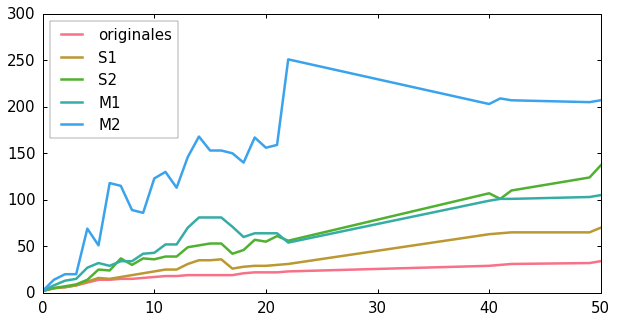

In [40]:
dfNbOverabundance.dropna(thresh=3).plot(figsize=(10,5))

L'analyse des surabondances se situe à deux niveaux :
1. dans le calcul des morphomes
1. dans le calcul des analogies

Pour le calcul des morphomes, on considère que des colonnes sont compatibles si toutes les cases surabondantes d'une colonne sont face à une case contenant les mêmes formes ou un sous-ensemble. TRAITER LES ENSEMBLES FACE AUX ENSEMBLES DANS LE TRAITEMENT.

L'analyse des analogies prend en compte les relations entre les formes surabondantes au même titre que les analogies entre formes dans des cases différentes. Cette stratégie vise à capter les généralisations sur la surabondance comme les surabondances systématiques.
